In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from qcodes.dataset.database import initialise_database
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.experiment_container import new_experiment

from qcodes.instrument_drivers.tektronix.DPO7200xx import TektronixDPO7000xx

In [2]:
tek = TektronixDPO7000xx("tek3", "TCPIP0::10.193.36.56::inst0::INSTR")

Connected to: TEKTRONIX DPO72004C (serial:C600651, firmware:CF:91.1CT FV:10.8.3 Build 3) in 0.26s


In [3]:
initialise_database()
experiment = new_experiment(name='DPO_72000_example', sample_name="no sample")

In [4]:
tek.channel[0].set_trace_time(2E-3)

Starting experimental run with id: 71


([<matplotlib.axes._subplots.AxesSubplot at 0x1d2570be160>,
 [None, None])

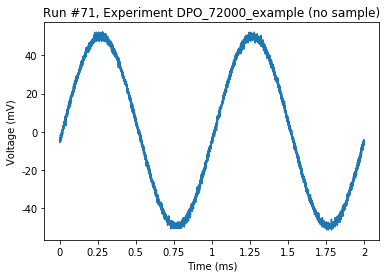

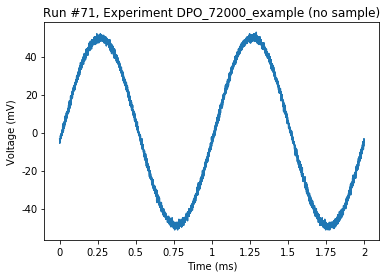

In [15]:
meas = Measurement(exp=experiment)
meas.register_parameter(tek.channel[0].trace)
meas.register_parameter(tek.channel[1].trace)

with meas.run() as datasaver:
    for i in [0, 1]:
        datasaver.add_result(
            (tek.channel[i].trace_axis, tek.channel[i].trace_axis()),
            (tek.channel[i].trace, tek.channel[i].trace())
        )

    dataid = datasaver.run_id

plot_by_id(dataid)

In [6]:
tek.channel[0].measure.type("amplitude")

In [7]:
tek.channel[0].measure.value()

0.09680000685155

In [8]:
tek.channel[0].measure.type("phase")

In [9]:
tek.channel[0].measure.source2("CH2")

In [10]:
tek.channel[0].measure.source2()

'CH2'

In [12]:
tek.channel[0].measure.value()

-0.40805440725404

In [14]:
tek.CH1.measure.source2("CH2")

In [16]:
tek.channel[0].measure.unit()

'°'